## Sample 3.1 The stellar density profile of the Galactic disk

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
'''
expon defines the exponential distribution
'''
def expon(z,h):
    return np.exp(-np.abs(z)/h)/h

C:\Users\HONOR\AppData\Local\Temp/ipykernel_16584/3163585040.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


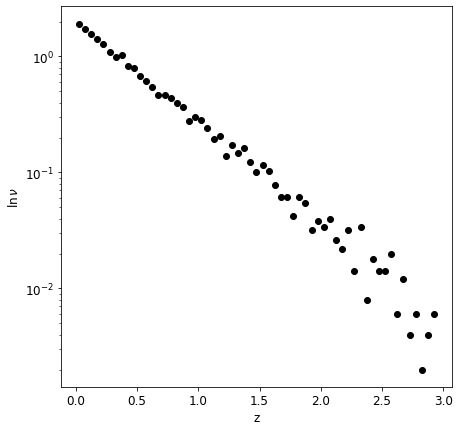

In [2]:
'''
generate some random stars with nu0=1, h=0.5
'''

nu0 = 1.
h = 0.5
n = 10000
sz=0.05 
z = np.random.exponential(h,size=n)

his,xedge = np.histogram(z,np.arange(0,3,sz))

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot((xedge[1:]+xedge[:-1])/2.,his/n/sz,'ko')
ax.set_yscale('log')
ax.set_xlabel(r'z',fontsize=12)
ax.set_ylabel(r'$\ln \nu$',fontsize=12)
fig.show()

C:\Users\HONOR\AppData\Local\Temp/ipykernel_16584/3728359098.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\HONOR\AppData\Local\Temp/ipykernel_16584/3728359098.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


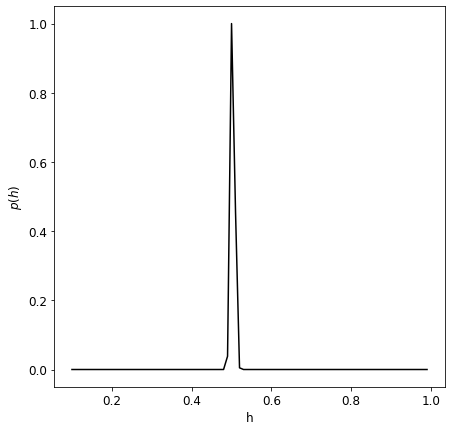

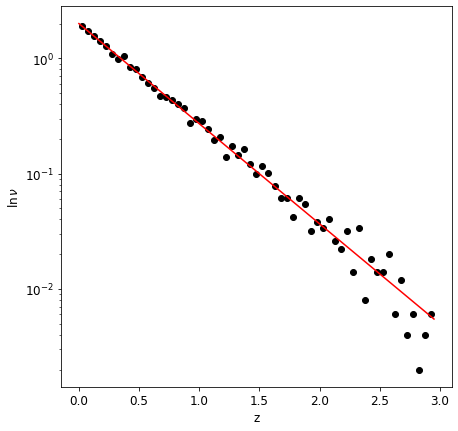

In [3]:
import scipy.stats as stats

'''
find best h with maximized likelihood
'''
s = np.arange(0.1,1.0,0.01)
likeli = np.zeros_like(s)
for i in range(len(s)):
    likeli[i] = np.sum(stats.expon.logpdf(z,scale=s[i]))
    #print(s[i],likeli[i])
    
# index corresponding max likeli
imax = np.argmax(likeli)

#show likelihood of h
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(s,np.exp(likeli-np.max(likeli)),'k-')
ax.set_xlabel(r'h',fontsize=12)
ax.set_ylabel(r'$p(h)$',fontsize=12)
fig.show()

#redraw density profilre with best-fit model
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot((xedge[1:]+xedge[:-1])/2.,his/n/sz,'ko')
ax.plot(xedge,expon(xedge,s[imax]),'r-')
ax.set_yscale('log')
ax.set_xlabel(r'z',fontsize=12)
ax.set_ylabel(r'$\ln \nu$',fontsize=12)
fig.show()